### Inteligencia Artificial

* Docente: Ing. Ruben Darios Florez Zela
* Alumno: Davis Bremdow Salazar Roa

# Sanidad del agua

El dataset relacionado al tema busca clasificar en función a los datos aluminium, ammonia, arsenic, ... is_safe establecer si el agua es segura para su consumo y el cual refleja sus datos en la columan is_safe.

Por lo tanto para realizar el análisis mediante un modelo de clasificación de Machine Learning en primera instancia se invocan las librerías a usar para este propósito y entre las cuales se puede destacar algunas asociadas al procesamiento de archivos csv, arreglos, graficos y finalmente algoritmo de machine learning como sklearn. 

### Importando las librerías

In [34]:
# Importando las librerias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Recopilación de datos
### 2. Análisis explorativo (básico)

En sitios web de los hostipales o clinicas se pueden optar por diferentes conjuntos de datos que resumen una problematica y con la cual se puede experimentar, sin embargo para decidir el modelo de ML a usar es necesario realizar un análisis de los datos recopilados, esto nos brindará un panorama general sobre su estructuras, características entre otros y con el cual escoger un modelo de regresión o clasificación.

In [35]:
df = pd.read_csv('waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


#### Prosiguiendo con el análisis
Con la función .info() la librería nos brinda un panorama genera sobre la cantidad de datos y el tipo de cada uno de estos, siendo para este caso que el dataset cuenta con 2 valores de cadena o string, lo cual supone una limitante para el entrenamiento.

Y para lo cual será necesario realizar el procesamiento de los mismos para proseguir con el entrenamiento

In [36]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   str    
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uranium      7999

#### Exploración de datos ..
A continuación la función .describe() genera un reporte estadistico de todos los datos númericos del dataset el cual nos brinda una panorama general de que tan dispersos se encuentran los datos, el min, max así como los perceptiles que son un indicador porcentual sobre la cantidad de datos usados.

De este análisis se puede decir que tan dispersos se encuentran los datos de algunas columnas como por ejemplo: aluminium tiene una baja dispersión de sus datos respecto a su media lo cual puede indicar que estos se puedan modelar mediante un secuencia lineal.

In [37]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


### Análisis exploratorio
Otra función que nos ayuda a analizar el dataset es .isnull().sum() la cual muestra un resumen de todos los valores nulos, con los cuales no se podría realizar un análisis y/o el entrenamiento de un modelo, por lo cual identificarlos es de vital importancia para realizar el tratamiento adecuado.

Para este caso no se cuenta con valores nulos, por lo que se puede seguir con en analísis

In [38]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

#### Tratamiento de los datos
En vista de que los datos str no se pueden analizar matematicamente es necesario eliminarlos o proceder con algún tipo de conversión, según su contenido, por lo tanto para su análisis en este caso se opto:
* Eliminar la columan ammonia
* Convertir la columna is_safe (valores números en str) a números

Con lo cual las limitantes para el entrenamiento fueron suprimidas

In [39]:
df = df.drop(columns=['ammonia'])
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce').astype('Int64')

### Matriz de correlación

La matriz de correlación es un método gráfico para analizar la linealidad entre 2 variables, para este caso se enfrentan todas las columnas entre si para la obtención de sus relaciones.

Y de las cuales se puede decir que existe una correlación positiva (1), negativa (-1) o no existe correlacción (0), siendo así que, por ejemplo para las columnas: 
* barium - cloramine: se puede decir que existe una correlación negativa o relación directa (cuando una variable incrementa la otra también)
Por otro lado:
* cadmium - is_safe: Tienen una baja correlación negativa (-0.26) que indica una relación inversa que define que cuendo una variable se incrementa la otra disminuye.

Finalmente la matriz de correlación se puede decir que la variable de salida is_safe tiene una baja correlación con el resto de columnas del dataset.

Text(0.5, 1.0, 'Matriz de correlación')

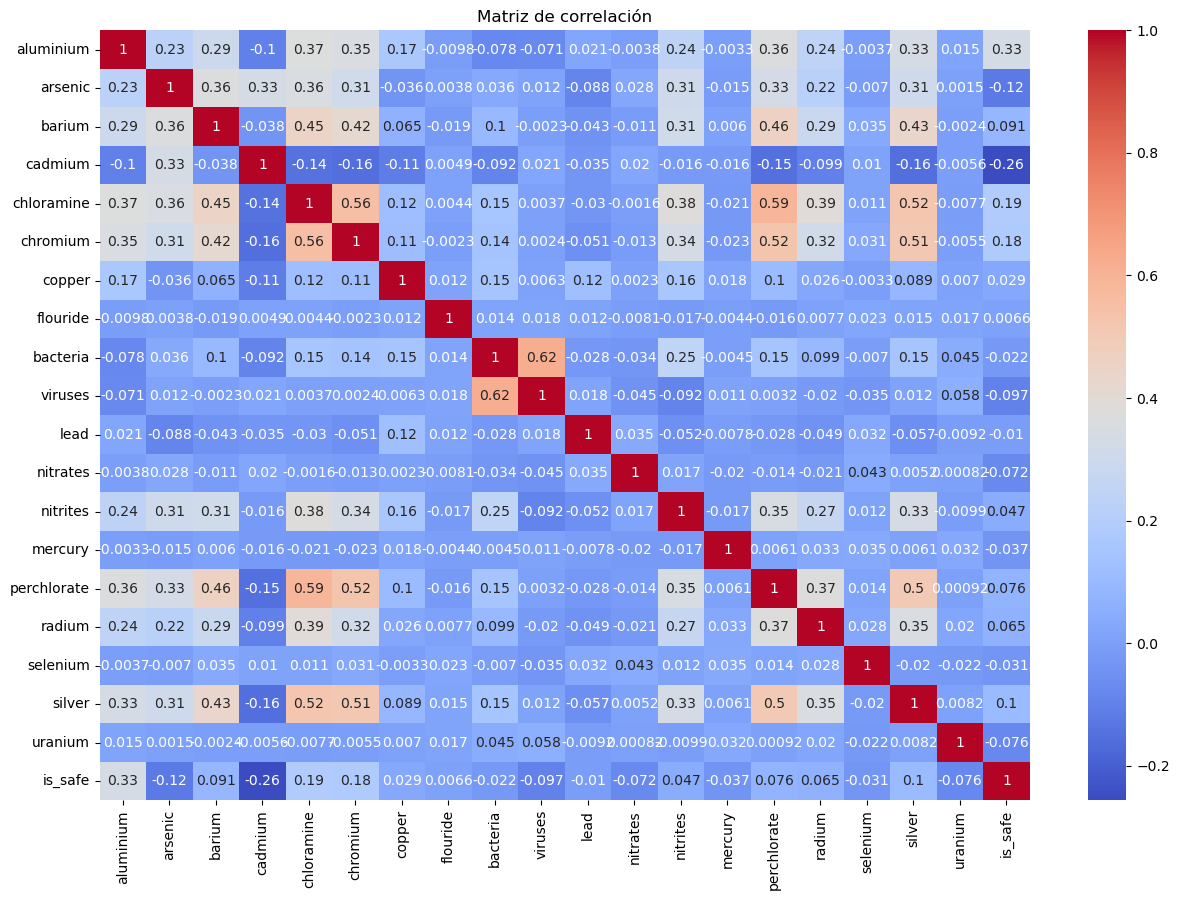

In [40]:
# Matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")

# Correlación positiva: Directamente proporcionales
# Correlación negativa: Inversamente proporcional (no necesariamente)

In [41]:
df = df.dropna()
df.isna().sum()

aluminium      0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [42]:
X = df.drop(columns=["is_safe"])
y = df["is_safe"]
X

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Valor min después de la estandarización: {X_scaled.min()}")
print(f"Valor min después de la estandarización: {X_scaled.max()}")

Valor min después de la estandarización: -2.3198971244603377
Valor min después de la estandarización: 3.5172776115725166


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [45]:
# Definir modelos
models = {
    "Logistic Regression" : LogisticRegression(max_iter=2000),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisitionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "GradientBoosting" : GradientBoostingClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}


Logistic Regression - Accuracy: 0.9012, Log loss: 0.2696
KNeighbors - Accuracy: 0.9019, Log loss: 0.8289
DecisitionTree - Accuracy: 0.9513, Log loss: 1.7571
RandomForest - Accuracy: 0.9506, Log loss: 0.1359
SVM - Accuracy: 0.9275, Log loss: 0.1750
GradientBoosting - Accuracy: 0.9500, Log loss: 0.1177
AdaBoost - Accuracy: 0.9281, Log loss: 0.4812


<Figure size 800x600 with 0 Axes>

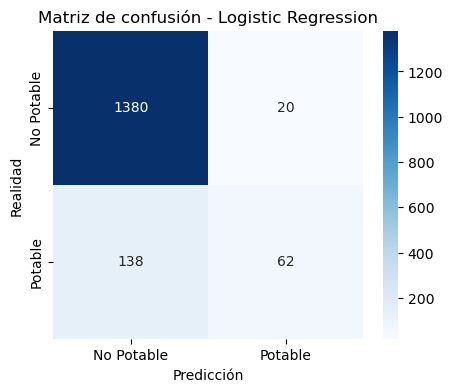

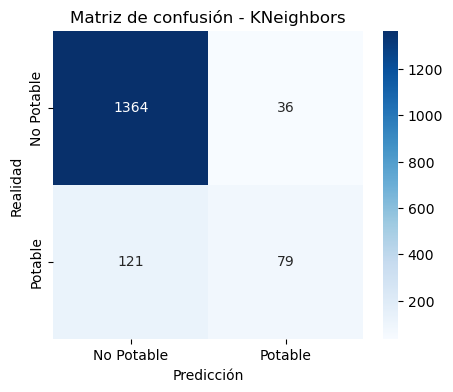

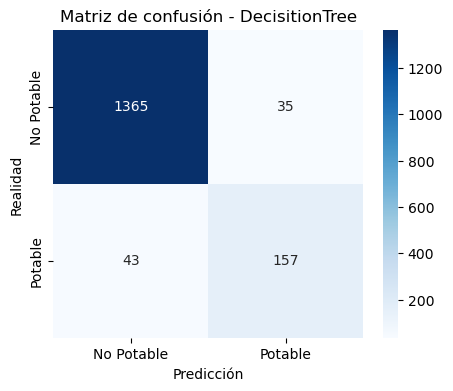

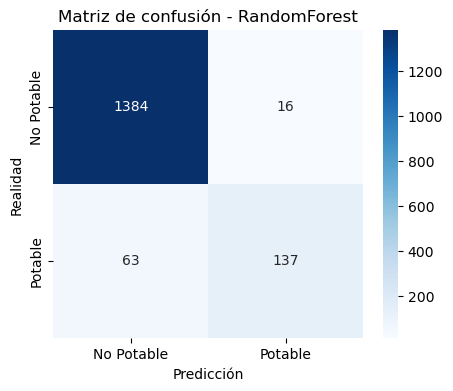

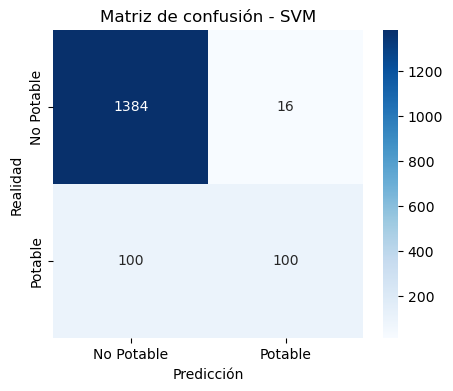

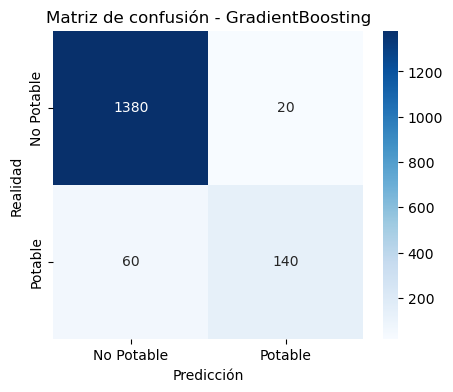

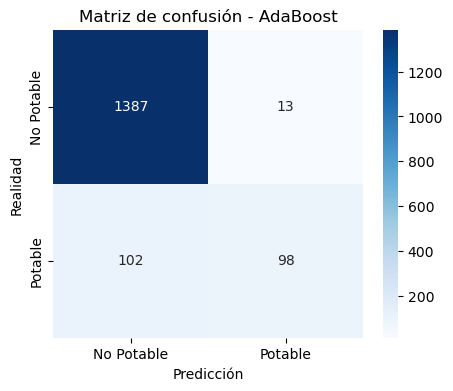

In [46]:
# Entrenar y evaluar modelos
plt.figure(figsize=(8, 6))
roc_curves = {}
accuracies = {}
log_losses = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular y almacenar el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # Calcular y almacenar log loss
    loss = log_loss(y_test, y_prob)
    log_losses[name] = loss

    print(f"{name} - Accuracy: {accuracy:.4f}, Log loss: {loss:.4f}")

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Potable", "Potable"], yticklabels=["No Potable", "Potable"])
    plt.xlabel("Predicción")
    plt.ylabel("Realidad")
    plt.title(f"Matriz de confusión - {name}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)


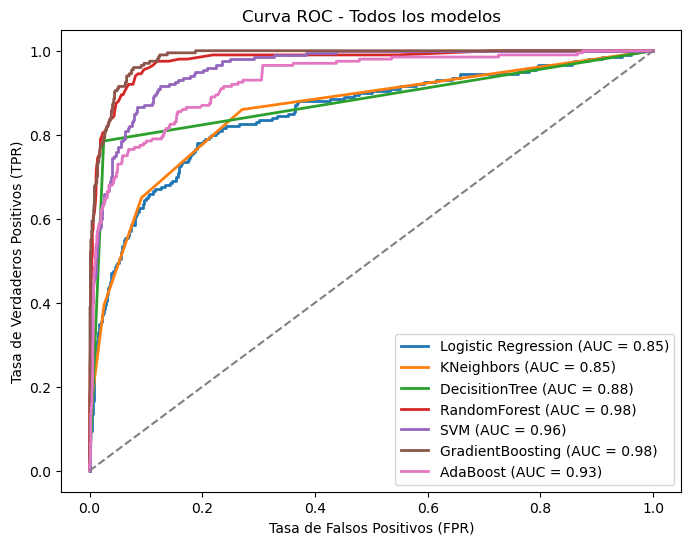

In [47]:
# Graficar todas ROCS en una sola gráfica
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items() :
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle="--")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Todos los modelos")
plt.legend(loc="lower right")

In [48]:
# Imprimir accuracies y log loss
print("Resultados de cada modelo: ")
for name in models.keys():
    print(f"{name} - Accuracy: {accuracies[name]:.4f}, Log Loss : {log_losses[name]:.4f}")


Resultados de cada modelo: 
Logistic Regression - Accuracy: 0.9012, Log Loss : 0.2696
KNeighbors - Accuracy: 0.9019, Log Loss : 0.8289
DecisitionTree - Accuracy: 0.9513, Log Loss : 1.7571
RandomForest - Accuracy: 0.9506, Log Loss : 0.1359
SVM - Accuracy: 0.9275, Log Loss : 0.1750
GradientBoosting - Accuracy: 0.9500, Log Loss : 0.1177
AdaBoost - Accuracy: 0.9281, Log Loss : 0.4812


#### Resultados
De los modelos entrenados se puede destacar que el modelo gradient boosting es el mejor modelo entrenado debido a su alto accuracy 95% y bajo error 11.77% la cual entalla en comparación al resto de modelos con errores más elevados y bajo accuracy.

Modelo que también se justifica mediante la curva ROC que cuenta con un gran área a una precisión del 98%.